In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy as db
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import query
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, text, inspect, MetaData, desc, func
from pathlib import Path

In [5]:
# create engine to hawaii.sqlite
database_path = Path("Resources", "hawaii.sqlite")

engine = create_engine(f"sqlite:///{database_path}")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
metadata = MetaData()


In [19]:
# reflect the tables
station = Base.classes.station
measurement = Base.classes.measurement
Session = sessionmaker(bind=engine)
session = Session()
stations = session.query(station).all()
measures = session.query(measurement).all()

for station in stations:
    print(station.station,station.name,station.latitude,station.longitude,station.elevation)

for measure in measures:
    print(measure.station,measure.date,measure.prcp,measure.tobs)


USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0
USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0
USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9
USC00518838 UPPER WAHIAWA 874.3, HI US 21.4992 -158.0111 306.6
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5
USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9
USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9
USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4
USC00519397 2010-01-01 0.08 65.0
USC00519397 2010-01-02 0.0 63.0
USC00519397 2010-01-03 0.0 74.0
USC00519397 2010-01-04 0.0 76.0
USC00519397 2010-01-06 None 73.0
USC00519397 2010-01-07 0.06 70.0
USC00519397 2010-01-08 0.0 64.0
USC00519397 2010-01-09 0.0 68.0
USC00519397 2010-01-10 0.0 73.0
USC00519397 2010-01-11 0.01 64.0
USC00519397 2010-01-12 0.0 61.0
USC00519397 2010-01-14 0.0 66.0
USC00519397 2010-01-15 0.0 65.0
USC005193

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
# stations
# measures

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
latest_date = max(measure.date for measure in measures)
print(latest_date)

2017-08-23


In [17]:
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')

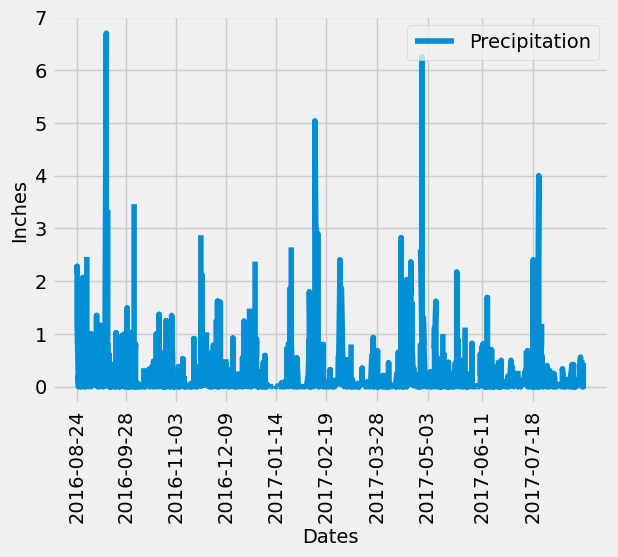

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
start_date = latest_date - timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_last_year = session.query(measurement).filter(measurement.date >= start_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measure_table = []

for row in prcp_last_year:
    rows = {
        "Station":row.station,
        "Date":row.date,
        "Precipitation":row.prcp,
        "Tobs":row.tobs
    }
    measure_table.append(rows)

# pprint(measure_table)

measure_df = pd.DataFrame(measure_table)

# Sort the dataframe by date
measure_df_sorted = measure_df.sort_values(by=['Date'], ascending=True)
measure_df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(measure_df_sorted["Date"], measure_df_sorted["Precipitation"])
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend(labels=["Precipitation"], loc="upper right")
x_ticks = measure_df_sorted["Date"]
plt.xticks(x_ticks[::227], rotation = 90)
plt.show()



In [50]:
measure_df

,Station,Date,Precipitation,Tobs
0,USC00519397,2016-08-24,0.08,79.0
1,USC00519397,2016-08-25,0.08,80.0
2,USC00519397,2016-08-26,0.00,79.0
3,USC00519397,2016-08-27,0.00,77.0
4,USC00519397,2016-08-28,0.01,78.0
...,...,...,...,...
2218,USC00516128,2017-08-19,0.09,71.0
2219,USC00516128,2017-08-20,NaN,78.0
2220,USC00516128,2017-08-21,0.56,76.0
2221,USC00516128,2017-08-22,0.50,76.0


In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_sum = measure_df_sorted["Precipitation"].describe()
summary_table = pd.DataFrame(precipitation_sum)
summary_table

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
station = Base.classes.station
total_stations = session.query(func.count(station.station)).all()
print(total_stations)

[(9,)]


In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
station = Base.classes.station
# active_stations = session.query(func.count(measurement.station)).\
#         group_by(measurement.station)

active_stations_query = session.query(measurement.station, func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc())

active_stations = active_stations_query.all()
# pprint(active_stations)
# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [83]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_repeated_id = "USC00519281"

# For last year ID = USC00519281
# repeated_station_df = measure_df.loc[measure_df["Station"]==most_repeated_id]


# For all time ID = USC00519281 DF
prcp = session.query(measurement).all()
measure_table = []

for row in prcp:
    rows = {
        "Station":row.station,
        "Date":row.date,
        "Precipitation":row.prcp,
        "Tobs":row.tobs
    }
    measure_table.append(rows)
# Creating DF, to then select just the ones that matches the ID
all_time_df = pd.DataFrame(measure_table)
repeated_station_df = all_time_df.loc[all_time_df["Station"]==most_repeated_id]
print(f'The average temperature for the ID({most_repeated_id}) is: {round(repeated_station_df["Tobs"].mean(), 3)}')
print(f'The max temperature for the ID({most_repeated_id}) is: {repeated_station_df["Tobs"].max()}')
print(f'The min temperature for the ID({most_repeated_id}) is: {repeated_station_df["Tobs"].min()}')

The average temperature for the ID(USC00519281) is: 71.664
The max temperature for the ID(USC00519281) is: 85.0
The min temperature for the ID(USC00519281) is: 54.0


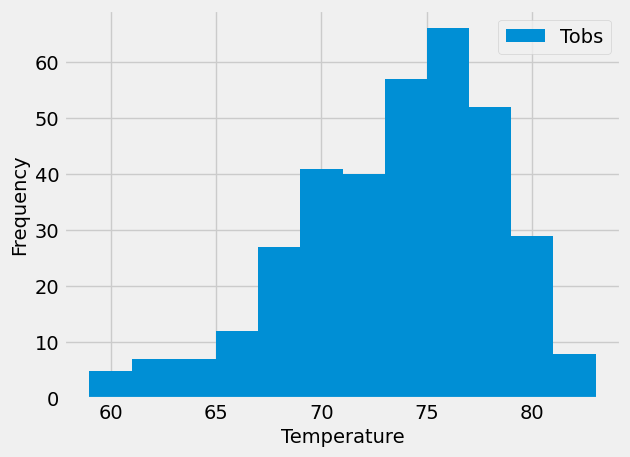

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
repeated_station_df = measure_df.loc[measure_df["Station"]==most_repeated_id]
plt.hist(repeated_station_df["Tobs"], bins=12, label="Tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [102]:
# Close Session
session.close()